<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/Reading_Writing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading / Writing data

Page 125-144

Pandas supports the integration of many file formats and data sources out of the box (csv, excel, sql, json, parquet)

## Reading data in text format
* The function pd.read_csv() allows you to read a file and store it in a DataFrame
- With the default options, files must have a header and the seperator is a comma 
- The file could be both on a disk or on the network 

In [0]:
import pandas as pd

#pd.read_csv("./Sacramentorealestatetransactions.csv")
housing = pd.read_csv("http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv")

In [0]:
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


The `pd.read_table()`function allows you to set the separator using the `sep` argument

In [0]:
%%writefile input_data.txt
a|b|c|d|message
1|2|3|4|hello
5|6|7|8|world
9|10|11|12|foo

Writing input_data.txt


In [0]:
pd.read_csv("input_data.txt", sep="|")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


The header parameter allows you to set whether or not a header exists

In [0]:
pd.read_csv("input_data.txt", sep="|", header =None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


The na_values parameter specifies the null values 

In [0]:
%%writefile input_data.txt
a|b|c|d|message
1|2|3|NA|hello
5|6|7|8|world
9|NA|11|12|foo

Overwriting input_data.txt


In [0]:
pd.read_table("input_data.txt", sep="|", na_values=["NA"])

,a,b,c,d,message
0,1,2.0,3,NaN,hello
1,5,6.0,7,8.0,world
2,9,NaN,11,12.0,foo


The `pd.read_fwf()`function allows you to read a file when the columns have fixed positions

In [0]:
%%writefile input_data.txt
a b   c   d   message
1 2   223 NA  hello
5 6   7   8   world
9 10  11  12  foo

Overwriting input_data.txt


In [0]:
pd.read_fwf("input_data.txt")

,a,b,c,d,message
0,1,2,223,NaN,hello
1,5,6,7,8.0,world
2,9,10,11,12.0,foo


The converters parameter allows you to set conversion functions in the columns of the DataFrame 

In [0]:
%%writefile input_data.txt
col1|col2|col3
one|1.232,12|a
two|2.000,32|b

Overwriting input_data.txt


In [0]:
pd.read_csv("input_data.txt", sep="|",
            converters={"col2":lambda value: float(value.replace(".","").replace(",","."))})

,col1,col2,col3
0,one,1232.12,a
1,two,2000.32,b


## Reading data from Excel 
- Pandas also allows you to read an Excel format file 
- If we want to read several sheets of the same Excel file, it is convenient to first load the file into memeory with the `pd.ExcelFile()` method

In [0]:
# df = pd.read_excel("Example_File.xlsx")
# df = pd.read_excel("Example_File.xlsx", "Example_Sheet")

# xlsx = pd.ExcelFile("Example_file.xlsx")
# df = pd.read_excel(xlsx, "Example_Sheet")

## Reading data from a JSON file

- Using the `pd.read_json()`function, pandas will read data in JSON format and load it into a DataFrame 

In [0]:
%%writefile input_data.json
[ {"a": 1, "b":2, "c":3},
  {"a": 4, "b":5, "c":6},
  {"a": 7, "b":8, "c":9}]

Writing input_data.json


In [0]:
pd.read_json("input_data.json")

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


An alternative is to use the json library to read the file 

In [0]:
import json 

with open("input_data.json") as json_data:
  result = json.load(json_data)

pd.DataFrame(result[:], columns =["a","b","c"])

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


#Reading data from a Web Service
- To read the data of a web service we could use the request library

In [0]:
import requests

url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)

if resp.ok:
  data = resp.json()
  dataframe = pd.DataFrame(data, columns=["number", "title","labels","state"])

dataframe.head()

,number,title,labels,state
0,33750,CLN: Remove is_null_period,[],open
1,33749,BUG: Fix mixed datetime dtype inference,"[{'id': 76865106, 'node_id': 'MDU6TGFiZWw3Njg2...",open
2,33748,BUG: to_hdf and HDFStore raise KeyError for Da...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
3,33746,QST: Does ExcelWriter accept a file object? Wh...,"[{'id': 1954720290, 'node_id': 'MDU6TGFiZWwxOT...",open
4,33745,BUG: support skew function for custom BaseInde...,"[{'id': 1045950827, 'node_id': 'MDU6TGFiZWwxMD...",open


## Reading data from HTML
- Pandas allows to read a file with HTML format through the `read_html()` function
- This function returns a list of dataframes (there may be several tables on the website

In [0]:
dataframes = pd.read_html("https://fdic.gov/bank/individual/failed/banklist.html")
dataframes[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
1,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
2,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
3,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
4,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"


## Data Writing
- Once we have a DataFrame in memory, we could write it to disk with one of the following functions:
  - `dataframe.to_csv("file.csv")`
  - `dataframe.to_excel("file.xlsx")`
  - `dataframe.to_json("file.json")`

In [0]:
xlsx = pd.ExcelWriter("file.xlsx")
dataframe.to_excel(xlsx)
xlsx.save()

## Reading data from a database
The sqlalchemy package allows you to connect to a database and load DataFrames from tables or queries

In [0]:
from sqlalchemy import create_engine 
# engine = create_engine("sqlite:///:memory:")
# pd.read_sql("SELECT * FROM tabla;", engine)
# pd_read_sql_table("table", engine)

# Exercise 23
- Load the information from the following url into a Dataframe called "df1"
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv


- Load the information from the following url into a Dataframe called "df2"
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
  - The column 'user_id' must be the index of the DataFrame

In [0]:
df1 = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",
                    )

df1.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [0]:
df2 = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", 
              sep ="|", 
              #header=None, 
              index_col= "user_id" 
              )

df2.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


# Exercise 24
- Write the dataframes from the previous exercise in an excel called "Data.xlsx"
  - df1' save it on a sheet called 'chipotle' (without the index)
  - 'df2' on another sheet called 'user'
- Recover in a different DataFrame the information from the 'user' sheet of the excel file "Data.xlsx".

# Exercise 25
- Read the data from the following web service in a DataFrame 
https://sedeaplicaciones.minetur.gob.es/ServiciosRESTCarburantes/PreciosCarburantes/EstacionesTerrestres/



# Exploring a DataFrame
- Pandas offers several functions to explore a Dataframe without printing all the content
-The `dataframe.shape` attribute shows the dimensions (number of rows and number of columns)

In [10]:
import pandas as pd
import os 

os.chdir("/content/sample_data")

dataframe = pd.read_csv("california_housing_test.csv")
dataframe.shape

(3000, 9)

## dataframe.columns & dataframe.index
- The `dataframe.columns` attribute shows the columns
- The `dataframe.index` attribute shows the indexes 

In [11]:
dataframe.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
dataframe.index

RangeIndex(start=0, stop=3000, step=1)

## `df.head()`
- df.head() shows the first rows of the DataFrame (5 by default)

In [13]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## `df.tail()`

- df.tail() shows the last rows of the DataFrame

In [14]:
dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


## `df.sample()`


- df.sample() shows an example of the dataframe

In [15]:
dataframe.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
609,-117.12,32.59,28.0,2793.0,706.0,1825.0,676.0,2.6724,144500.0
734,-117.65,35.00,36.0,1184.0,316.0,672.0,241.0,1.9107,39800.0
1660,-117.90,33.73,31.0,1171.0,306.0,1690.0,301.0,3.2639,155200.0
1935,-118.43,34.27,36.0,1002.0,250.0,1312.0,249.0,3.0240,148000.0
1298,-121.86,37.41,16.0,1603.0,287.0,1080.0,296.0,6.1256,266900.0


##`df.info()`
- shows summary information about the
DataFrame

In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


## `df.count()`
- returns an array with the number of non-null values fro each of the columns

In [20]:
dataframe.count()

longitude             3000
latitude              3000
housing_median_age    3000
total_rooms           3000
total_bedrooms        3000
population            3000
households            3000
median_income         3000
median_house_value    3000
dtype: int64

In [21]:
dataframe.count(axis =1)

0       9
1       9
2       9
3       9
4       9
       ..
2995    9
2996    9
2997    9
2998    9
2999    9
Length: 3000, dtype: int64

## `df.describe()`
- returns a DataFrame with statistical information on each of the numerical columns

In [22]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


## `df.cov()` 
- returns a DataFrame with the result of
applying the covariance function in each of the
numerical columns (all with all)

In [23]:
dataframe.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,3.979771,-3.929984,-1.608112,2.144331e+02,5.876508e+01,2.293768e+02,3.722418e+01,-0.069188,-1.143276e+04
latitude,-3.929984,4.535492,-0.672300,-1.819390e+02,-6.041129e+01,-2.574793e+02,-5.314994e+01,-0.285796,-3.334838e+04
housing_median_age,-1.608112,-0.672300,157.637958,-9.955608e+03,-1.686447e+03,-3.880217e+03,-1.400132e+03,-3.360256,1.298250e+05
total_rooms,214.433055,-181.938962,-9955.608036,4.646583e+06,8.402063e+05,1.863485e+06,7.200520e+05,884.457656,3.911853e+07
total_bedrooms,58.765078,-60.411288,-1686.447113,8.402063e+05,1.727686e+05,3.668332e+05,1.474479e+05,18.519657,3.868661e+06
population,229.376803,-257.479345,-3880.217212,1.863485e+06,3.668332e+05,1.062019e+06,3.372421e+05,61.845972,-1.389295e+05
households,37.224178,-53.149936,-1400.131655,7.200520e+05,1.474479e+05,3.372421e+05,1.335338e+05,32.952200,4.140940e+06
median_income,-0.069188,-0.285796,-3.360256,8.844577e+02,1.851966e+01,6.184597e+01,3.295220e+01,3.439214,1.411192e+05
median_house_value,-11432.762614,-33348.376798,129825.029543,3.911853e+07,3.868661e+06,-1.389295e+05,4.140940e+06,141119.191538,1.279606e+10


## `df.corr()` 
- returns a DataFrame with the result of
applying the correlation function in each of the numerical columns (all with all)

In [24]:
dataframe.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


## Visualize df.corr()
Using the Python visualization tools we could visualize the correlation matrix

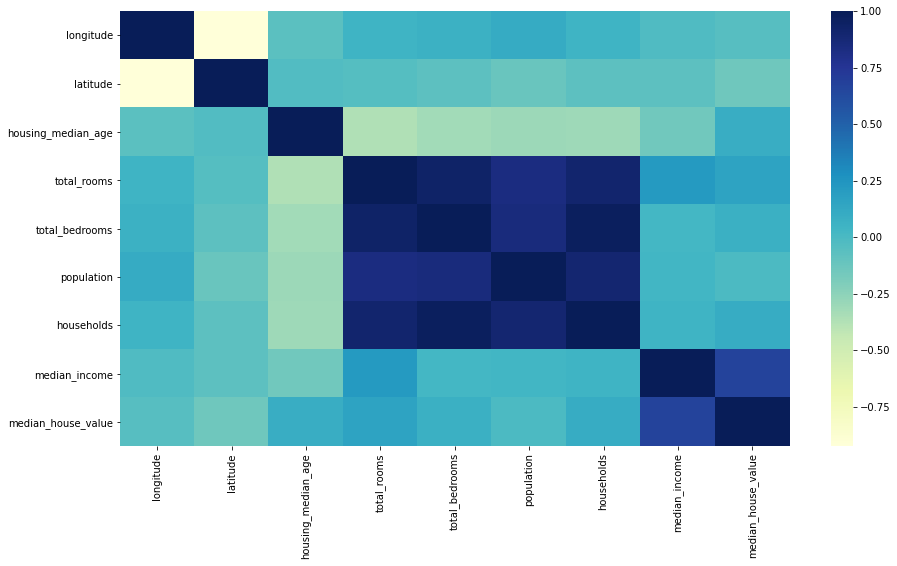

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

corr = dataframe.corr()
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            cmap="YlGnBu")

# Exercise 26 
1. Load the anscombe.json from the sample_data
2. Show the dimensions of the DataFrame
3. Print the columns and row indexes
4. It shows the first 3 rows
5. Shows the last 2 rows
6. Displays summary information about the Dataframe
7. Check if any of the columns correlate with any other
8. Shows the number of values in each of the columns
9. Displays statistical information about the column ‘V’

In [0]:
# 1. Loading data 
os.chdir("/content/sample_data")
df = pd.read_json("anscombe.json")

In [38]:
# 2. Show the dimensions of DF
df.shape

(44, 3)

In [41]:
# 3. Print column and row indices
print(df.columns)
print(df.index)

Index(['Series', 'X', 'Y'], dtype='object')
RangeIndex(start=0, stop=44, step=1)


In [42]:
# 4. Show the first 3 rows
df.head(3)

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58


In [43]:
# 5. Show the last 2 rows
df.tail(2)

,Series,X,Y
42,IV,8,7.91
43,IV,8,6.89


In [47]:
# 6. Display a summary of statistical info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     int64  
 2   Y       44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [50]:
# 7. Check if columns correlate
print(df.corr())
print(df.cov())

          X         Y
X  1.000000  0.816308
Y  0.816308  1.000000
           X         Y
X  10.232558  5.116047
Y   5.116047  3.838637


In [58]:
# 8. Show number of values in each of the columns
df.count()

Series    44
X         44
Y         44
dtype: int64

In [57]:
# 9. Display statistical information 
df.describe()

,X,Y
count,44.000000,44.000000
mean,9.000000,7.500455
std,3.198837,1.959244
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


# Operations on a DataFrame

## Common operations in a Dataframe
- Pandas allows to do operations like filtering a Dataframe, ordering it, selecting columns, renaming them, modifying them and even grouping them
- What all these functions have in common is that they do not modify the dataframe, but return another dataframe

In [60]:
df = pd.DataFrame({"C1" : ["Afghanistan", "Afghanistan", "Brazil", "Brazil", "China", "China"],
                   "C2" : [1999, 2000,1999,2000,1999,2000],
                   "C3" : [745, 266,37737,80488,212258,213766],
                   "C4" : [19987071,20595360,172006362,174504898,1272915272,1280428583]})

df

,C1,C2,C3,C4
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


## Rename columns
- The `rename()` function allows you to rename both the row index and the column index of a Dataframe

In [61]:
df = df.rename(columns = {"C1": "Country",
                          "C2": "Year",
                          "C3": "Cases",
                          "C4": "Population"})

df

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


The rename() function could **accept a function to make the modification** , instead of a dictionary

In [62]:
df.rename(columns = lambda column :column.lower())

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [63]:
df.rename(index = lambda row : "Row"+str(row))

,Country,Year,Cases,Population
Row0,Afghanistan,1999,745,19987071
Row1,Afghanistan,2000,266,20595360
Row2,Brazil,1999,37737,172006362
Row3,Brazil,2000,80488,174504898
Row4,China,1999,212258,1272915272
Row5,China,2000,213766,1280428583


# Exercise 27
- Explore the DataFrame “liga”:
- Rename the name of the columns making sure they are
materialized in the dataset

In [0]:
liga = pd.read_excel("/LigaBBVA_20170329.xlsx")

In [68]:
liga.head()

,#,Equipo,PJ,V,E,D,GF,GC,PTS
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Real Madrid,27.0,20.0,5.0,2.0,71.0,28.0,65.0
2,2,Barcelona,28.0,19.0,6.0,3.0,81.0,25.0,63.0
3,3,Sevilla,28.0,17.0,6.0,5.0,52.0,34.0,57.0
4,4,Atlético Madrid,28.0,16.0,7.0,5.0,52.0,23.0,55.0


In [0]:
liga = liga.rename(columns= {"#" : "Puesto",
             "PJ": "Partidos Jugados",
             "V": "Victorias",
             "E": "Empates",
             "D": "Derrotas",
             "GF": "Goles Favor",
             "GC": "Goles Contra",
             "PTS": "Puntos"})

In [75]:
liga.head()

,Puesto,Equipo,Partidos Jugados,Victorias,Empates,Derrotas,Goles Favor,Goles Contra,Puntos
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Real Madrid,27.0,20.0,5.0,2.0,71.0,28.0,65.0
2,2,Barcelona,28.0,19.0,6.0,3.0,81.0,25.0,63.0
3,3,Sevilla,28.0,17.0,6.0,5.0,52.0,34.0,57.0
4,4,Atlético Madrid,28.0,16.0,7.0,5.0,52.0,23.0,55.0


# Exercise 28
- Rename the columns, so that they are in capital letters 
- but do not save it in the DataFrame

In [78]:
liga.rename(columns = lambda columns: columns.upper()).head()

,PUESTO,EQUIPO,PARTIDOS JUGADOS,VICTORIAS,EMPATES,DERROTAS,GOLES FAVOR,GOLES CONTRA,PUNTOS
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Real Madrid,27.0,20.0,5.0,2.0,71.0,28.0,65.0
2,2,Barcelona,28.0,19.0,6.0,3.0,81.0,25.0,63.0
3,3,Sevilla,28.0,17.0,6.0,5.0,52.0,34.0,57.0
4,4,Atlético Madrid,28.0,16.0,7.0,5.0,52.0,23.0,55.0


## Column selection 
- There is no specific function to select columns in Panda
- Just use an an array of names 

In [80]:
df

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [82]:
df[["Year", "Country", "Country"]]

,Year,Country,Country
0,1999,Afghanistan,Afghanistan
1,2000,Afghanistan,Afghanistan
2,1999,Brazil,Brazil
3,2000,Brazil,Brazil
4,1999,China,China
5,2000,China,China


# Exercise 29
Use the DataFrame “liga":
- Select the “Puesto" and "Puntos" columns
- Select all columns in alphabetical order (sorted)

In [84]:
liga.head(2)

,Puesto,Equipo,Partidos Jugados,Victorias,Empates,Derrotas,Goles Favor,Goles Contra,Puntos
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Real Madrid,27.0,20.0,5.0,2.0,71.0,28.0,65.0


In [86]:
liga[["Puesto", "Puntos"]].head(2)

,Puesto,Puntos
0,0,NaN
1,1,65.0


In [89]:
liga.sort_index(axis=1).head(3)

,Derrotas,Empates,Equipo,Goles Contra,Goles Favor,Partidos Jugados,Puesto,Puntos,Victorias
0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2.0,5.0,Real Madrid,28.0,71.0,27.0,1,65.0,20.0
2,3.0,6.0,Barcelona,25.0,81.0,28.0,2,63.0,19.0


## Row filtering 
The `query()` function allows you to filter the rows of a
Dataframe in the same way that the WHERE clause in a
SQL statement does

In [93]:
df.query("Country=='China' or Year == 1999")

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [94]:
df.query("Country =='Afghanistan'")

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360


In [95]:
df.query("Year not in (2000,2001)")

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272


In [97]:
df[df.Country.str.contains("^C")]

,Country,Year,Cases,Population
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [100]:
df[~df.Country.isnull()]

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [102]:
df[df.Year.isin([1999])]

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272


In [103]:
df.Year.value_counts().index[:1]

Int64Index([1999], dtype='int64')

In [104]:
df[df.Year.isin(df.Year.value_counts().index[:1])]

,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
4,China,1999,212258,1272915272


# Exercise 30 
Work on the DataFrame "liga"
- Search the rows for Real Madrid and Barcelona
- Look for rows whose position is less than or equal to 2
or more than or equal to 20
- Look for lines whose wins are greater than or equal to
18 and the goals scored are greater than 60

In [105]:
liga.head(2)

,Puesto,Equipo,Partidos Jugados,Victorias,Empates,Derrotas,Goles Favor,Goles Contra,Puntos
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Real Madrid,27.0,20.0,5.0,2.0,71.0,28.0,65.0


In [119]:
liga[liga.Equipo.isin(["Barcelona", "Real Madrid"])]

,Puesto,Equipo,Partidos Jugados,Victorias,Empates,Derrotas,Goles Favor,Goles Contra,Puntos
1,1,Real Madrid,27.0,20.0,5.0,2.0,71.0,28.0,65.0
2,2,Barcelona,28.0,19.0,6.0,3.0,81.0,25.0,63.0


In [135]:
liga[liga.Puesto.isin([range(3),range(20,len(liga))])]

,Puesto,Equipo,Partidos Jugados,Victorias,Empates,Derrotas,Goles Favor,Goles Contra,Puntos


[20]